<a href="https://colab.research.google.com/github/a-forty-two/dfe_jul_2022/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
datapath = 'https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv'

In [4]:
import pandas as pd
data = pd.read_csv(datapath)
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# SAKE of DEMO-> let's go with limited columns
col_names_to_keep = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
dataset = data.loc[:,col_names_to_keep]
# COULD have also written the following
# for same output but pass indexes instead of 
# column names
# dataset = data.iloc[:, :11]


In [6]:
# SELECTING our data:
# Know the column names-> LOCATION
# Know the column positions [indexes]-> INDEX of LOCATION
# LOCATION-> .loc
# INDEX_OF_LOCATION-> .iloc
# .loc-> we pass names of columns 
# .iloc-> we pass NUMBERS representing columns!


In [8]:
dataset.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


In [10]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [11]:
# DISCRETE and CONTINUOUS!
# UNIQUE values in the columns!
# if unique value counts are close to the item count
# then its a regression problem!

# if unique value counts are significantly less than
# the final item count-> classification problem

In [12]:
# DIAGNOSIS -> LABEL / PROBLEM TO SOLVE
# DIAGNOSIS-> 2 values-> M and B
# total item count-> 569
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
dataset['diagnosis'].value_counts().count()
# CLASSIFICATION PROBLEM INDICATED

2

In [15]:
dataset['radius_mean'].value_counts().count()
# REGRESSION PROBLEM INDICATED!

456

In [16]:
for col_name in dataset.columns:
  print(col_name, end=" ")
  print(dataset[col_name].value_counts().count())

id 569
diagnosis 2
radius_mean 456
texture_mean 479
perimeter_mean 522
area_mean 539
smoothness_mean 474
compactness_mean 537
concavity_mean 537
concave points_mean 542
symmetry_mean 432
fractal_dimension_mean 499


In [19]:
# MISSING vlaues per columns
# 0 is FALSE
# non-zero or 1 is TRUE
# ISNA-> gave us True/False as result
# true wherever null value was found
# false wherever values were present/non-null
# If I find sum of all the TRUES inside, 
# i will get to know the missing values!
for col_name in dataset.columns:
  print(col_name, end=" ")
  print(dataset[col_name].isna().sum())

id 0
diagnosis 0
radius_mean 0
texture_mean 0
perimeter_mean 0
area_mean 0
smoothness_mean 0
compactness_mean 0
concavity_mean 0
concave points_mean 0
symmetry_mean 0
fractal_dimension_mean 0


In [21]:
random_list = [False, True, True, False]
random_list[0]+random_list[1]+ random_list[2] + random_list[3]

2

In [22]:
# Correlations: values b/w -1 to +1
# POSITIVE
# NEGATIVE
# ZERO
dataset.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


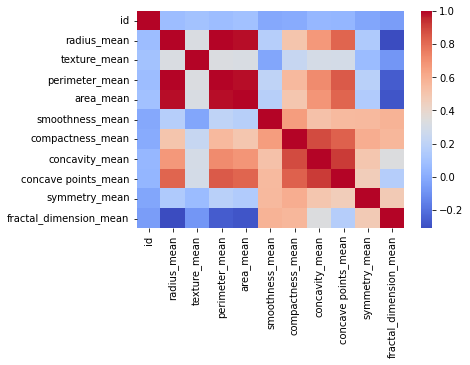

In [26]:
# ABove matrix is TOO much to read
# and make decisions
# all I wanted was pos, neg, or 0!
# VISUALIZATION is a better approach here!
import seaborn as sns
corrs = dataset.corr()
sns.heatmap(corrs, cmap='coolwarm')
# cmap = color map, cool warm-> blue/red color
# JUST EASIER TO LOOK AT, no tech significance

In [28]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [29]:
# these values are represented in 2 rows!
# in NUMPY-> lists need to be columnar to operate!
# list_a / list_b -> the size of 2 lists should
# be same!

# if we extract Mean and Standard_dev as-is,
# they will be extracted as ROWS instead of columns!
# while to enable (data-mean)/standard_dev,
# they ALL need to be columns!

# Transform COLUMNS into ROWS (and vice-versa)
# MATRIX TRANSPOSE

dataset.describe().T
# NOW FROM THIS-> we can extract columns
# called mean and std!

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.00000,0.02956,0.06154,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.00000,0.02031,0.03350,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


In [ ]:
# Z-Score:
# (data-mean) / standard_deviation
# all need to be tabular or columnar!
# but i cannot subtract or divide a ROW from a dataset!

# our table contains a lot of columns
# for mean and std-> every column is a sep
# entity-> 
# [data.radius-meanradius]/std_dev_radius!
# for every column!

In [30]:
mu = dataset.describe().T['mean']
sigma = dataset.describe().T['std']

In [31]:
transformed_dataset = (dataset-mu)/sigma

In [32]:
transformed_dataset.tail(10)

,area_mean,compactness_mean,concave points_mean,concavity_mean,diagnosis,fractal_dimension_mean,id,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
559,-0.714348,-0.042433,-0.202798,0.280993,NaN,0.411082,-0.235534,-0.718097,-0.742695,-0.266656,-1.545248,1.078892
560,-0.154836,0.156383,-0.151513,-0.554182,NaN,-0.154044,-0.235534,-0.024241,-0.021933,0.208311,-1.001736,1.827549
561,-0.764076,-1.301977,-1.260710,-1.113893,NaN,-1.101588,-0.235533,-0.876540,-0.830662,-1.555040,-2.741705,2.343703
562,0.176210,1.976019,1.169266,2.084810,NaN,1.235403,-0.235531,0.470430,0.310072,0.600088,1.154075,2.634331
563,1.966704,2.258148,2.537980,2.867552,NaN,0.848737,-0.235527,2.100128,1.927530,0.962713,1.230677,1.348594
564,2.341795,0.218868,2.318924,1.945573,NaN,-0.930209,-0.235524,2.058974,2.109139,1.040926,-0.312314,0.720838
565,1.722326,-0.017817,1.262558,0.692434,NaN,-1.057681,-0.235522,1.614511,1.703356,0.102368,-0.217473,2.083301
566,0.577445,-0.038646,0.105684,0.046547,NaN,-0.894800,-0.235520,0.672084,0.701667,-0.839745,-0.808406,2.043775
567,1.733693,3.269267,2.656528,3.294046,NaN,1.042778,-0.235518,1.980781,1.836725,1.524426,2.135315,2.334403
568,-1.346604,-1.149741,-1.260710,-1.113893,NaN,-0.560539,-0.242193,-1.812793,-1.806811,-3.109349,-0.819349,1.220718


In [33]:
transformed_dataset[transformed_dataset>3]

,area_mean,compactness_mean,concave points_mean,concavity_mean,diagnosis,fractal_dimension_mean,id,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
0,NaN,3.280628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.399917,NaN,NaN,NaN,4.906602,NaN,NaN,NaN,3.280667,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,3.269267,NaN,3.294046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
tf_dataset = transformed_dataset
for col_name in tf_dataset.columns:
  print(col_name, end=" ")
  blah = tf_dataset[col_name]
  blah2 = (blah >= 3).sum() # values > 3
  blah3 = (blah <= -3).sum() # values < -3
  total_outlier_count = blah2 + blah3
  print(total_outlier_count)

area_mean 8
compactness_mean 9
concave points_mean 6
concavity_mean 9
diagnosis 0
fractal_dimension_mean 7
id 11
perimeter_mean 7
radius_mean 5
smoothness_mean 5
symmetry_mean 5
texture_mean 4


In [ ]:
# Looped over all columns
# for each column:
# - extracted all vlaues of that col in blah
# - checked if any of them > 3
# - if they were, they would be returned
#    as true/false [also meaning 1 and 0]
#     -> calculate SUM = total values > 3
# - repeated the same logic with < -3


In [ ]:
# Strategy 1: either remove the outliser
# or
# Strategy 2: set them to 3 or -3

#  let's apply strategy 1
# remove all the outliers
# we need the INDEX of the values to be removed!


In [49]:
tf_dataset.index

RangeIndex(start=0, stop=569, step=1)

In [50]:
# ID column for us is USELESS!
# ID also has all the values unique 
# (just like a regular index)
# why don't we just convert ID column
# into our index, find outlier indexes
# and remove them!


In [51]:
tf_dataset.set_index('id')
tf_dataset.tail(10)

,area_mean,compactness_mean,concave points_mean,concavity_mean,diagnosis,fractal_dimension_mean,id,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
559,-0.714348,-0.042433,-0.202798,0.280993,NaN,0.411082,-0.235534,-0.718097,-0.742695,-0.266656,-1.545248,1.078892
560,-0.154836,0.156383,-0.151513,-0.554182,NaN,-0.154044,-0.235534,-0.024241,-0.021933,0.208311,-1.001736,1.827549
561,-0.764076,-1.301977,-1.260710,-1.113893,NaN,-1.101588,-0.235533,-0.876540,-0.830662,-1.555040,-2.741705,2.343703
562,0.176210,1.976019,1.169266,2.084810,NaN,1.235403,-0.235531,0.470430,0.310072,0.600088,1.154075,2.634331
563,1.966704,2.258148,2.537980,2.867552,NaN,0.848737,-0.235527,2.100128,1.927530,0.962713,1.230677,1.348594
564,2.341795,0.218868,2.318924,1.945573,NaN,-0.930209,-0.235524,2.058974,2.109139,1.040926,-0.312314,0.720838
565,1.722326,-0.017817,1.262558,0.692434,NaN,-1.057681,-0.235522,1.614511,1.703356,0.102368,-0.217473,2.083301
566,0.577445,-0.038646,0.105684,0.046547,NaN,-0.894800,-0.235520,0.672084,0.701667,-0.839745,-0.808406,2.043775
567,1.733693,3.269267,2.656528,3.294046,NaN,1.042778,-0.235518,1.980781,1.836725,1.524426,2.135315,2.334403
568,-1.346604,-1.149741,-1.260710,-1.113893,NaN,-0.560539,-0.242193,-1.812793,-1.806811,-3.109349,-0.819349,1.220718


In [53]:
transformed_dataset.head()

,area_mean,compactness_mean,concave points_mean,concavity_mean,diagnosis,fractal_dimension_mean,id,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
0,0.983510,3.280628,2.530249,2.650542,NaN,2.253764,-0.236197,1.268817,1.096100,1.567087,2.215566,-2.071512
1,1.907030,-0.486643,0.547662,-0.023825,NaN,-0.867889,-0.236196,1.684473,1.828212,-0.826235,0.001391,-0.353322
2,1.557513,1.052000,2.035440,1.362280,NaN,-0.397658,0.431362,1.565126,1.578499,0.941382,0.938859,0.455786
3,-0.763792,3.399917,1.450431,1.914213,NaN,4.906602,0.431741,-0.592166,-0.768233,3.280667,2.864862,0.253509
4,1.824624,0.538866,1.427237,1.369806,NaN,-0.561956,0.431821,1.775011,1.748758,0.280125,-0.009552,-1.150804


In [54]:
# I HAVE ENDED UP NORMALIZING Diagnosis and ID 
# as well! WHICH IS UNDESIRED, but now
# we have no idea what original values were!
# lesson-> extract only the numbers that you need


In [55]:
# REMOVE diagnosis and id from the dataset
df = dataset.set_index('id')

In [56]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [57]:
diagnosis = df.pop('diagnosis') # removes and returns
# the column from a dataset

In [58]:
df.head()
# NO MORE DIAGNOSIS, no more ID!

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [87]:
# DF is the clean data w/o Diagnosis, ID
stats = df.describe().T
mu = stats['mean']
sigma = stats['std']
df_normalized = (df-mu)/sigma
# Z-SCORE = (data-mean)/standard_dev


In [61]:
#df_normalized has outliers
# we need to find IDs that have outliers
# inside them, and del them from dataset

In [82]:
total_outliers = []
for col_name in df_normalized.columns:
  outliers = df_normalized[(df_normalized[col_name]>3) | (df_normalized[col_name]<-3)]
  outlier_indexes = outliers.index
  df_normalized = df_normalized.drop(outlier_indexes)
  diagnosis = diagnosis.drop(outlier_indexes)

In [76]:
df_normalized.tail(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
925236,-1.334911,1.997275,-1.346107,-1.090008,-1.075807,-1.034428,-1.113893,-1.260710,-0.253950,-0.312677
925277,0.131300,0.788264,0.181940,0.006282,-0.826946,0.542653,0.176878,-0.297894,-1.304498,-0.188037
925291,-0.742695,1.078892,-0.718097,-0.714348,-0.266656,-0.042433,0.280993,-0.202798,-1.545248,0.411082
925292,-0.021933,1.827549,-0.024241,-0.154836,0.208311,0.156383,-0.554182,-0.151513,-1.001736,-0.154044
925311,-0.830662,2.343703,-0.876540,-0.764076,-1.555040,-1.301977,-1.113893,-1.260710,-2.741705,-1.101588
925622,0.310072,2.634331,0.470430,0.176210,0.600088,1.976019,2.084810,1.169266,1.154075,1.235403
926125,1.927530,1.348594,2.100128,1.966704,0.962713,2.258148,2.867552,2.537980,1.230677,0.848737
926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209
926682,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681


In [77]:
df_normalized.describe()
# Clean data without outliers!

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,-0.053556,-0.034327,-0.059413,-0.066827,-0.063956,-0.104198,-0.106600,-0.094264,-0.081978,-0.077495
std,0.898147,0.944710,0.890926,0.854573,0.926778,0.861330,0.845624,0.872908,0.901036,0.864922
min,-2.027864,-2.227289,-1.982759,-1.453164,-2.406852,-1.608721,-1.113893,-1.260710,-2.741705,-1.818265
25%,-0.685942,-0.725325,-0.689187,-0.665685,-0.747845,-0.780370,-0.754948,-0.750761,-0.712653,-0.729794
50%,-0.240431,-0.120819,-0.248325,-0.310414,-0.104186,-0.291899,-0.385027,-0.428297,-0.120808,-0.202909
75%,0.384560,0.536580,0.433391,0.260535,0.555649,0.423364,0.352180,0.443482,0.479244,0.413207
max,2.594376,2.750582,2.532245,2.930007,2.896711,2.901932,2.886368,2.764768,2.857567,2.806143


In [83]:
df_normalized['diagnosis'] = diagnosis

In [84]:
df_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
id,,,,,,,,,,,
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,M
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,M
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,M
843786,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,M
844359,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,M


In [85]:
# Machine Learning 
# LINE passing through the graph 
# that either regresses or classifies the data

# y = mx + c
# output = weights * input + bias
# Machine learning is making machine find
# out the values for weights and bias
# We already know Y and X
# Y = diagnosis
# X = everything else
#     (that passed correlation test)
# only unknowns in eq are W and B
# ML= finding out the values of W and B
# X needs to be normalized
# WHY-> because it makes math easier
# If we don't normalize the values
# 
# happiness = w1*money + w2*time + bias
# money = -1 billion to + 1billion
# age = 0 to 100
# so MONEY will impact our EQUATION way more
# than age does!

In [86]:
# FIXING -> making sure ALL values 
# are in same scale

# 2 very popular formula:
# 1) Z-scoring -> outliers requires values
# to be normalized! 
#     AVERAGE value is set to 0, and all
#     other values become b/w -3 to +3
#     anything >3, <-3 should be removed
# 2) MinMax -> PIXELS -> (R,G,B)
#       pixels are between 0 to 255, and
#       colors have no meaning of negative
#       numbers!
#     wherever z-scoring doesn't make sense,
# we use-> (data-min)/(max-min)
# here the max vlaue will become 1, 
# min value will become 0, and all values
# will be scaled between 0 and 1!


In [ ]:
# COLORS-> smallest value= 0, largest= 255
# normalizing images = (image-0)/(255-0)
# normalizing images = image/255


In [89]:
# ONLY FOR DEMO
import tensorflow as tf
from tensorflow import keras
image_dataset = keras.datasets.fashion_mnist

In [90]:
images = image_dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [98]:
img = images[0][0]
img[0].shape

(28, 28)

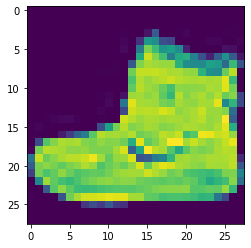

In [99]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(img[0])
plt.show()

In [100]:
min_pix = img[0].min()
max_pix = img[0].max()
min_pix, max_pix

(0, 255)

In [101]:
# norm_img = (img[0]-0) / (255.0 - 0)
norm_img = img[0] / 255.0

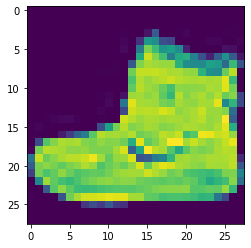

In [102]:
plt.figure()
plt.imshow(norm_img)
plt.show()

In [103]:
min_pix, max_pix

(0, 255)

In [104]:
norm_img.min(), norm_img.max()

(0.0, 1.0)

In [ ]:
# NORMALIZATION DOES NOT CHANGE
# THE DIRECTION of YOUR DATA!
# only the magnitude changes
# [ALL OF THE VALUES on A GRAPH are vectors]
